# Hack the Hackers - HSBC ML Hackathon 2023
## Machine-Learning - Payment- Transfer Problem

https://www.hackerearth.com/challenges/competitive/hack-the-hackers-hsbc-ml-hackathon-2023/machine-learning/payment-transfer-8-4ea2d65c/

__Problem Description:__ You are working as a data scientist with the Payments team of the bank. The team is continually responding to
the emerging threats by building up cutting-edge machine learning driven models and strategies, working with the
best-in-class service providers specialized in counter-fraud solutions. In recent years, there has been an increased
scrutiny of the digital payments to check for its genuineness.

To aid the team to deal with this problem, you are provided with the payments data to predict whether the
customer themselves have made the transfer or not.The payments data contains the attributes which gets
captures when a payment is initiated by a banking customer.

__Task:__
You are required to build a machine learning model that can predict whether the customer themselves have
made the transfer or not.

__Dataset description:__

The dataset folder contains the following files:

* train.csv: 233633 x 14

* train_helper.csv: 1231200 x 10

* test.csv: 215852 x 13

* test_helper.csv: 1160950 x 10

* sample submission.csv: 215852 x 3

Based on the given data below are the assumptions.

V1 - CUID: This column represents the customer unique identifier, which is a unique identifier assigned to each customer of the bank.

V2 - TID: This column represents the transaction identifier, which is a unique identifier assigned to each payment transaction initiated by the customer.

V3 - EID: This column represents the event identifier, which is a unique identifier assigned to each event that is related to the payment transaction. An event can be any action related to the transaction, such as a change in its status.

V4 - Amount: This column represents the amount of money transferred in the payment transaction.

V5 - Timestamp: This column represents the date and time when the payment transaction was initiated by the customer.

V6 - Unknown

V7 - Unknown

V8 - Unknown

V9 - Unknown

V10 -Unknown

V11 - Unknown

V12 - Unknown

Target - Fraudulent: This column represents the target variable, which indicates whether the payment transaction is fraudulent or not. A value of 1 indicates a fraudulent transaction, and a value of 0 indicates a genuine transaction.

V13 - Unknown Date.

# Exploratory data analysis

In [1]:
# import python modules
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import ADASYN
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures, DropCorrelatedFeatures, RecursiveFeatureElimination
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
import xgboost as xgb
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import recall_score
sns.set(font_scale=1.6)
    
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 16
    
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
print(os.getcwd())

G:\Final_laptop_backup\HSBC_challenge\Notebook


In [3]:
# Load the payments data into a Pandas DataFrame
train_data = pd.read_csv("G:/Final_laptop_backup/HSBC_challenge/dataset/train.csv")

In [4]:
print('Train Data shape: ',train_data.shape)

Train Data shape:  (233633, 14)


In [5]:
#lets check how data looks like
train_data.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474,A,BA1,BB425559,PD44707,CC1,CP0,0,2020-03-21 00:00:00
1,CUID5533,TID244499,EID1459012,393.45200,2020-04-28 07:17:12,33227,A,BA4793,BB248012,PD39453,CC1,CP0,0,2020-04-28 00:00:00
2,CUID5278,TID311877,EID0,375.75000,2020-08-15 04:11:43,0,F,BA5631,BB166256,PD237664,CC1,CP0,0,NaN


In [6]:
#lets check the data types of the columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233633 entries, 0 to 233632
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      233633 non-null  object 
 1   V2      233633 non-null  object 
 2   V3      233633 non-null  object 
 3   V4      233633 non-null  float64
 4   V5      233633 non-null  object 
 5   V6      233633 non-null  int64  
 6   V7      233633 non-null  object 
 7   V8      233633 non-null  object 
 8   V9      233633 non-null  object 
 9   V10     233633 non-null  object 
 10  V11     233633 non-null  object 
 11  V12     233633 non-null  object 
 12  Target  233633 non-null  int64  
 13  V13     231762 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 25.0+ MB


In [7]:
#describe numerical column
train_data.describe()

,V4,V6,Target
count,233633.000000,233633.000000,233633.000000
mean,266.360390,103071.463312,0.005521
std,1338.657212,143360.598172,0.074101
min,0.008350,0.000000,0.000000
25%,12.525000,33227.000000,0.000000
50%,33.400000,33227.000000,0.000000
75%,115.230000,33227.000000,0.000000
max,41750.000000,447246.000000,1.000000


In [8]:
#describe categorical column
train_data.describe(include = ['O'])

,V1,V2,V3,V5,V7,V8,V9,V10,V11,V12,V13
count,233633,233633,233633,233633,233633,233633,233633,233633,233633,233633,231762
unique,3684,233633,206627,231004,6,35508,5765,40909,1,4075,2922
top,CUID914,TID229526,EID0,2020-09-15 08:11:46,A,BA58575,BB3336,PD254442,CC1,CP176843,2020-03-18 00:00:00
freq,3467,1,1330,5,228596,7100,26028,3547,233633,3467,1376


In [9]:
# check target distribution before marging
train_data['Target'].value_counts()

0    232343
1      1290
Name: Target, dtype: int64

In [10]:
# Check unique value for each attribute
train_data.nunique()

V1          3684
V2        233633
V3        206627
V4         16207
V5        231004
V6           307
V7             6
V8         35508
V9          5765
V10        40909
V11            1
V12         4075
Target         2
V13         2922
dtype: int64

#### Possibly there are variables that are numerical but represents categorical values or vice versa. Lets check.

In [11]:
train_data.select_dtypes(np.number)

,V4,V6,Target
0,485.69445,376474,0
1,393.45200,33227,0
2,375.75000,0,0
3,6.97225,0,0
4,16.70000,0,0
...,...,...,...
233628,41.75000,391083,0
233629,83.50000,391083,0
233630,41.75000,391083,0
233631,167.00000,53,0


### Observation:
V6 it seems categorical. Lets make it categorical.

In [12]:
#convert V6 to categorical
train_data['V6'] = train_data['V6'].astype(str)

In [13]:
quantitative = []
qualitative = []
for i in train_data.columns:
    if train_data.dtypes[i] != 'object':
        quantitative.append(i)
    else:
        qualitative.append(i)
print('quantitative:: ',quantitative)
print('qualitative:: ',qualitative)

quantitative::  ['V4', 'Target']
qualitative::  ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13']


# Analyzing numerical variable

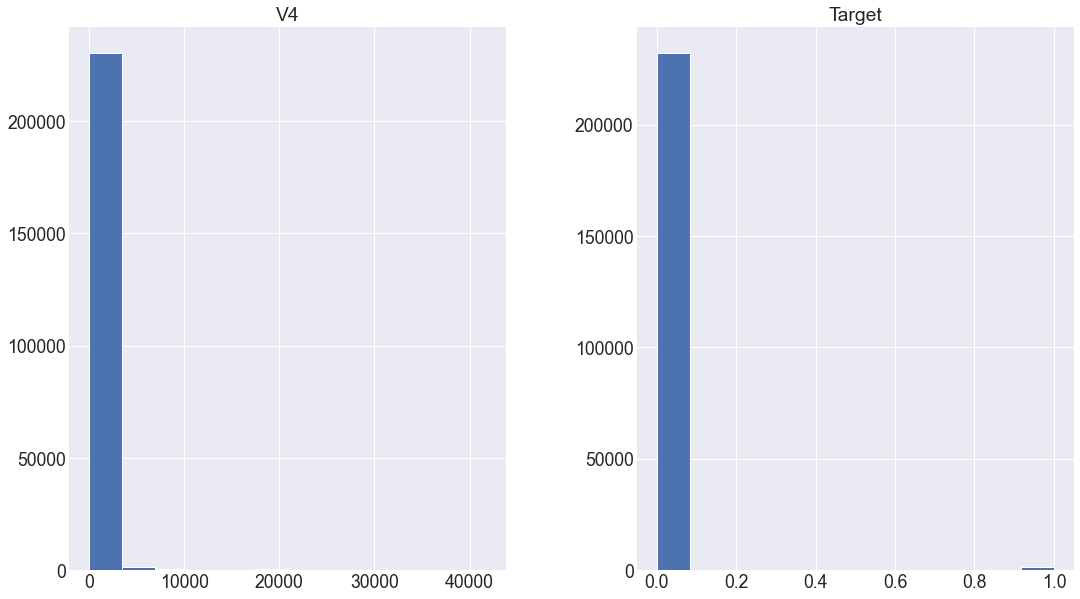

In [14]:
#Analyzing nuumerical variable
train_data[quantitative].hist(bins=12, figsize=(18, 10));

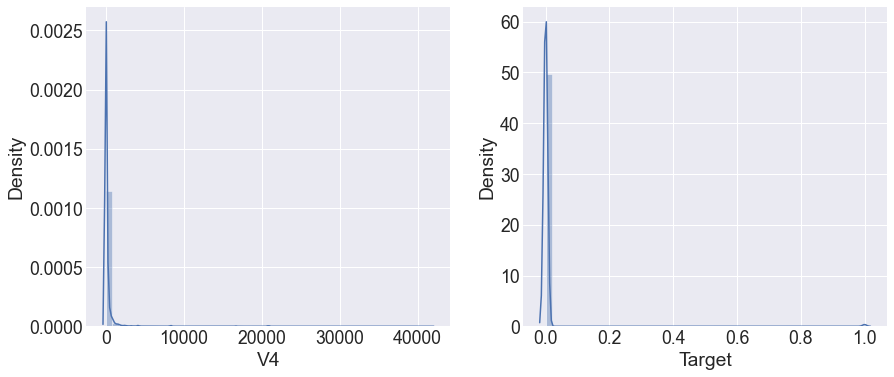

In [15]:
num_attributes = train_data.select_dtypes(exclude='object')
columns = num_attributes.columns.tolist()
j = 1
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams['font.size'] = 15
for column in columns:
    plt.subplot(3, 4, j)
    sns.distplot(num_attributes[column]);
    
    j += 1

In [16]:
#Analyzing categorical variable
# fig, ax = plt.subplots(2, 4, figsize=(22, 12))
# for variable, subplot in zip(qualitative, ax.flatten()):
#     if variable not in ['V1','V2','V3','V5','V6','V9','V10','V12','V13']:
#         sns.countplot(train_data[variable], ax=subplot)
#         for label in subplot.get_xticklabels():
#             label.set_rotation(90)

In [17]:
#Possibly there are variables that are numerical but represents categorical values or vice versa. Lets check.
train_data.select_dtypes(np.number)

,V4,Target
0,485.69445,0
1,393.45200,0
2,375.75000,0
3,6.97225,0
4,16.70000,0
...,...,...
233628,41.75000,0
233629,83.50000,0
233630,41.75000,0
233631,167.00000,0


In [18]:
#Pandas profiling
profile = pp.ProfileReport(train_data)
profile.to_file("EDA_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Handle Missing Value

In [19]:
#Check for missing value
train_data.isnull().sum()

V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
Target       0
V13       1871
dtype: int64

In [20]:
#Check missing data percentage
missing = (train_data.isnull().sum() / train_data.shape[0] * 100).sort_values(ascending=False)
missing = missing[missing > 0]
missing

V13    0.800829
dtype: float64

We are extracting features using V13 column later in feature engineering section. There we have mentioned the imputation logic.

# Target distribution check for all features

In [ ]:
sns.displot(train_data, x='V4', hue='Target', multiple="stack")

In [ ]:
train_data.plot.scatter(x = 'V4', y = 'Target', s = 10);

In [ ]:
sns.displot(train_data, x='V15', hue='Target', multiple="stack")

# Feature Engineering

lets add some more feature which we may or may not going to use in the model

# V1, V2, V3

We can use number of unique transactions for a given customer ID.

In [21]:
# Group the DataFrame by CUID and count the unique transactions for each V1
unique_transactions = train_data.groupby('V1')['V2'].nunique()

In [22]:
# Create a new DataFrame with the unique transactions for each V1
df_unique_transactions = pd.DataFrame({'V1': unique_transactions.index, 'unique_transactions': unique_transactions.values})


In [23]:
df_unique_transactions.head(3)

,V1,unique_transactions
0,CUID1,42
1,CUID10,31
2,CUID100,14


In [24]:
# Merge the original DataFrame with the new DataFrame on V1
train_data = pd.merge(train_data, df_unique_transactions, on='V1')

# V4
it looks like amount of transaction. now with this information what feature could be extracted.<br>
if a transaction amount is significantly larger than the average transaction or anomalous for a given account it may be fraud.

In [25]:
# Calculate the 95% quantile transaction amount for each customer V1
quantile_amounts = train_data.groupby('V1')['V4'].quantile(.95)

In [26]:
# Define a function to check if a transaction amount is significantly larger than the average
def is_significantly_larger_quantile(row):
    quantile_amount = quantile_amounts[row['V1']]
    if row['V4'] > quantile_amount:
        return 1
    else:
        return 0

# Add a new column to the dataframe indicating if the transaction amount is significantly larger than the average
train_data['is_large_amount_quantile'] = train_data.apply(is_significantly_larger_quantile, axis=1)

In [27]:
# Calculate the average transaction amount for each customer V1
avg_amounts = train_data.groupby('V1')['V4'].mean()

In [28]:
# Define a function to check if a transaction amount is significantly larger than the average
def is_significantly_larger(row):
    avg_amount = avg_amounts[row['V1']]
    if row['V4'] > avg_amount * 1.5:
        return 1
    else:
        return 0

# Add a new column to the dataframe indicating if the transaction amount is significantly larger than the average
train_data['is_large_amount_average'] = train_data.apply(is_significantly_larger, axis=1)


### similar amount
For a given customer id(V1) if we order it by transaction time(V5) older to newest and if the current amount(V4) is same as previous transaction.


### multiple transaction: 
column indicating whether there have been multiple transactions within a short period of time


### potential_fraud:
Based on excel observation if we group any transaction based on customer id(column V1) and sort it based on transaction time(column V5) in historical order then if the value of column V8 and V9 are exactly same to their previous value then it is most likely a fraud.

# V5, V13

In [29]:
train_data['V5'] = pd.to_datetime(train_data['V5'])
train_data['V13'] = pd.to_datetime(train_data['V13'])

In [30]:
%%time
# define the time window for multiple transactions
time_window = timedelta(minutes=60)

# create a new column for multiple transactions
train_data['multiple_transactions'] = 0

# add a new column 'similar_transaction' with default value 0
train_data['similar_transaction'] = 0

train_data['potential_fraud'] = 0

# loop through each unique customer ID
for customer_id in train_data['V1'].unique():
    # subset the dataframe for the current customer ID
    customer_df = train_data[train_data['V1'] == customer_id]
    # sort the dataframe by transaction date
    customer_df = customer_df.sort_values(by='V5')
    # loop through each row in the dataframe
    for i in range(1, len(customer_df)):
        # calculate the time difference between the current and previous transactions
        time_diff = customer_df.iloc[i]['V5'] - customer_df.iloc[i-1]['V5']
        # check if the time difference is within the time window
        if time_diff <= time_window:
            # set the multiple_transactions flag to True for the current and previous transactions
            train_data.at[customer_df.index[i], 'multiple_transactions'] = 1
            train_data.at[customer_df.index[i-1], 'multiple_transactions'] = 1
        
        if customer_df.iloc[i]['V4'] == customer_df.iloc[i-1]['V4'] :
            train_data.at[customer_df.index[i], 'similar_transaction'] = 1
            train_data.at[customer_df.index[i-1], 'similar_transaction'] = 1
        
        if customer_df.iloc[i]['V8'] == customer_df.iloc[i-1]['V8'] and customer_df.iloc[i]['V9'] == customer_df.iloc[i-1]['V9']:
            train_data.at[customer_df.index[i], 'potential_fraud'] = 1
            train_data.at[customer_df.index[i-1], 'potential_fraud'] = 1  


CPU times: total: 6min 42s
Wall time: 6min 48s


In [31]:
train_data['day'] = [i.day for i in train_data.V5]
#train_data['day_name'] = [i.day_name() for i in train_data.V5]
train_data['day_of_year'] = [i.dayofyear for i in train_data.V5]
train_data['week_of_year'] = [i.weekofyear for i in train_data.V5]
train_data['month'] = [i.month for i in train_data.V5]
train_data['hour'] = [i.hour for i in train_data.V5]
train_data['is_weekday'] = [i.isoweekday() for i in train_data.V5]
# check if each date is a weekend day (Saturday or Sunday)
train_data['is_weekend'] = train_data.V5.dt.dayofweek.isin([5,6])
train_data['is_weekend'] = train_data['is_weekend'].replace({True: 1, False: 0})

train_data['day_V13'] = [i.day for i in train_data.V13]
#train_data['day_name'] = [i.day_name() for i in train_data.V5]
train_data['day_of_year13'] = [i.dayofyear for i in train_data.V13]
train_data['week_of_year13'] = [i.weekofyear for i in train_data.V13]
train_data['month13'] = [i.month for i in train_data.V13]
train_data['hour13'] = [i.hour for i in train_data.V13]
train_data['is_weekday13'] = [i.isoweekday() for i in train_data.V13]
train_data['is_weekend13'] = train_data.V13.dt.dayofweek.isin([5,6])
train_data['is_weekend13'] = train_data['is_weekend13'].replace({True: 1, False: 0})

In [32]:
train_data['V13_V5_diff'] = (train_data['V5'] - train_data['V13']).dt.total_seconds().div(3600)

In [33]:
train_data.V13_V5_diff.describe()

count    231762.000000
mean      16435.598695
std       20631.653343
min         -11.083056
25%        2739.988194
50%        9580.447083
75%       21884.131181
max      151104.187222
Name: V13_V5_diff, dtype: float64

<AxesSubplot:ylabel='Frequency'>

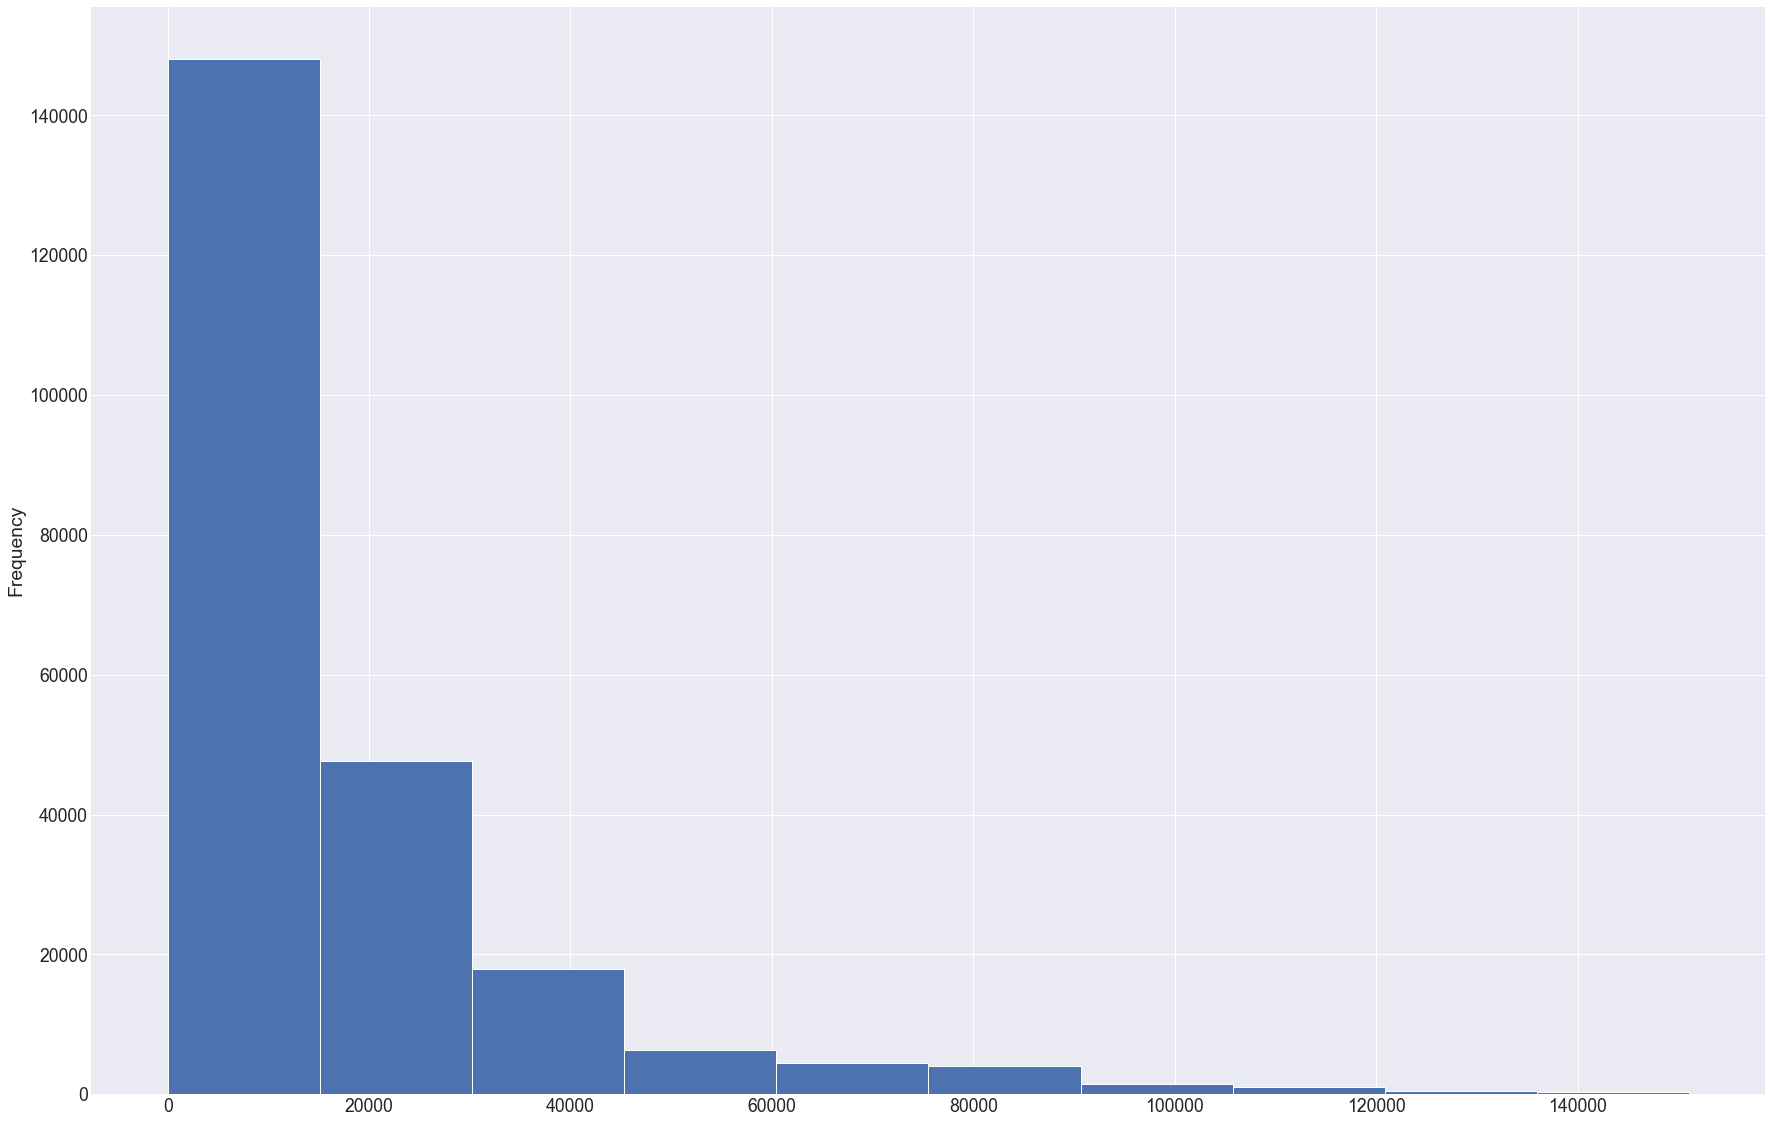

In [34]:
train_data.V13_V5_diff.plot(kind = 'hist')

In [35]:
# Calculate the difference in minutes between the 'V6' and 'V5' columns
train_data['V13_V5_diff'] = train_data['V13_V5_diff'].fillna(train_data['V13_V5_diff'].median())
train_data['day_V13'] = train_data['day_V13'].fillna(train_data['day_V13'].median())
train_data['day_of_year13'] = train_data['day_of_year13'].fillna(train_data['day_of_year13'].median())
train_data['week_of_year13'] = train_data['week_of_year13'].fillna(train_data['week_of_year13'].median())
train_data['month13'] = train_data['month13'].fillna(train_data['month13'].median())
train_data['hour13'] = train_data['hour13'].fillna(train_data['hour13'].median())
train_data['is_weekday13'] = train_data['is_weekday13'].fillna(train_data['is_weekday13'].median())
train_data['is_weekend13'] = train_data['is_weekend13'].fillna(train_data['is_weekend13'].median())


In [36]:
#Check for missing value
train_data.isnull().sum()

V1                             0
V2                             0
V3                             0
V4                             0
V5                             0
V6                             0
V7                             0
V8                             0
V9                             0
V10                            0
V11                            0
V12                            0
Target                         0
V13                         1871
unique_transactions            0
is_large_amount_quantile       0
is_large_amount_average        0
multiple_transactions          0
similar_transaction            0
potential_fraud                0
day                            0
day_of_year                    0
week_of_year                   0
month                          0
hour                           0
is_weekday                     0
is_weekend                     0
day_V13                        0
day_of_year13                  0
week_of_year13                 0
month13   

# V11 
contains only one constant value. Ltes remove this column

In [37]:
train_data.drop(['V11'], axis = 1, inplace = True)

In [38]:
train_data = train_data.sort_values(['V1', 'V5'])

In [39]:
train_data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,is_weekday,is_weekend,day_V13,day_of_year13,week_of_year13,month13,hour13,is_weekday13,is_weekend13,V13_V5_diff
163778,CUID1,TID229024,EID493934,4.175,2020-03-19 00:59:23,33227,A,BA387251,BB407516,PD173604,...,4,0,19.0,79.0,12.0,3.0,0.0,4.0,0,0.989722
163773,CUID1,TID115165,EID493934,334.835,2020-03-19 01:00:37,33227,A,BA287136,BB407516,PD344141,...,4,0,14.0,74.0,11.0,3.0,0.0,6.0,1,121.010278
163776,CUID1,TID737,EID493934,2505.000,2020-03-19 01:02:15,33227,A,BA287136,BB407516,PD344141,...,4,0,14.0,74.0,11.0,3.0,0.0,6.0,1,121.037500
163775,CUID1,TID229025,EID493934,208.750,2020-03-19 01:02:52,33227,A,BA287136,BB407516,PD344141,...,4,0,14.0,74.0,11.0,3.0,0.0,6.0,1,121.047778
163772,CUID1,TID342460,EID1041695,492.650,2020-03-20 21:50:18,33227,A,BA287136,BB407516,PD344141,...,5,0,14.0,74.0,11.0,3.0,0.0,6.0,1,165.838333


In [40]:
# create a new column that indicates the time difference between each transaction and the previous transaction for each customer
train_data['time_diff'] = train_data.groupby('V1')['V5'].diff().fillna(pd.Timedelta(seconds=0))


In [41]:
# group by customer ID and calculate the time difference between consecutive transactions
train_data['time_diff_grouped'] = train_data.groupby('V1')['time_diff'].shift(-1).fillna(pd.Timedelta(seconds=0))


In [42]:
# convert time difference to minutes
train_data['time_diff'] = train_data['time_diff'].dt.total_seconds().div(60).astype(int)
# convert grouped time difference to minutes
train_data['time_diff_grouped'] = train_data['time_diff_grouped'].dt.total_seconds().div(60).astype(int)


In [43]:
train_data.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,day_V13,day_of_year13,week_of_year13,month13,hour13,is_weekday13,is_weekend13,V13_V5_diff,time_diff,time_diff_grouped
163778,CUID1,TID229024,EID493934,4.175,2020-03-19 00:59:23,33227,A,BA387251,BB407516,PD173604,...,19.0,79.0,12.0,3.0,0.0,4.0,0,0.989722,0,1
163773,CUID1,TID115165,EID493934,334.835,2020-03-19 01:00:37,33227,A,BA287136,BB407516,PD344141,...,14.0,74.0,11.0,3.0,0.0,6.0,1,121.010278,1,1


In [44]:
quantitative = []
qualitative = []
for i in train_data.columns:
    if train_data.dtypes[i] != 'object':
        quantitative.append(i)
    else:
        qualitative.append(i)
print('quantitative:: ',quantitative)
print('qualitative:: ',qualitative)

quantitative::  ['V4', 'V5', 'Target', 'V13', 'unique_transactions', 'is_large_amount_quantile', 'is_large_amount_average', 'multiple_transactions', 'similar_transaction', 'potential_fraud', 'day', 'day_of_year', 'week_of_year', 'month', 'hour', 'is_weekday', 'is_weekend', 'day_V13', 'day_of_year13', 'week_of_year13', 'month13', 'hour13', 'is_weekday13', 'is_weekend13', 'V13_V5_diff', 'time_diff', 'time_diff_grouped']
qualitative::  ['V1', 'V2', 'V3', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12']


In [45]:
train_data.nunique()

V1                            3684
V2                          233633
V3                          206627
V4                           16207
V5                          231004
V6                             307
V7                               6
V8                           35508
V9                            5765
V10                          40909
V12                           4075
Target                           2
V13                           2922
unique_transactions            306
is_large_amount_quantile         2
is_large_amount_average          2
multiple_transactions            2
similar_transaction              2
potential_fraud                  2
day                             31
day_of_year                    184
week_of_year                    27
month                            7
hour                            24
is_weekday                       7
is_weekend                       2
day_V13                         31
day_of_year13                  364
week_of_year13      

In [46]:
train_data.drop(['V1','V2','V3','V5', 'V6', 'V8','V9','V10','V12','V13'], axis = 1, inplace = True)

In [47]:
one_hot_encoded_data = pd.get_dummies(train_data, columns = ['V7'])
one_hot_encoded_data.head()

,V4,Target,unique_transactions,is_large_amount_quantile,is_large_amount_average,multiple_transactions,similar_transaction,potential_fraud,day,day_of_year,...,is_weekend13,V13_V5_diff,time_diff,time_diff_grouped,V7_A,V7_B,V7_C,V7_D,V7_E,V7_F
163778,4.175,0,42,0,0,1,0,0,19,79,...,0,0.989722,0,1,1,0,0,0,0,0
163773,334.835,0,42,0,0,1,0,1,19,79,...,1,121.010278,1,1,1,0,0,0,0,0
163776,2505.000,0,42,1,1,1,0,1,19,79,...,1,121.037500,1,0,1,0,0,0,0,0
163775,208.750,0,42,0,0,1,0,1,19,79,...,1,121.047778,0,2687,1,0,0,0,0,0
163772,492.650,0,42,0,1,0,0,1,20,80,...,1,165.838333,2687,4841,1,0,0,0,0,0


# Feature selection

#### Searching for Duplicated or Quasi-constant features

In [48]:
#Searching for Duplicated or Quasi-constant features
sel = DropConstantFeatures(tol=0.99, variables=None)

sel.fit(one_hot_encoded_data)

features_to_drop = list(sel.features_to_drop_)
print(features_to_drop)

['Target', 'hour13', 'V7_C', 'V7_D', 'V7_E', 'V7_F']


#### Looking for Correlated Features

In [49]:
#Looking for Correlated Features
sel = DropCorrelatedFeatures(threshold=0.80,    # more than 80% = remove
                             method='pearson') # you can use other methods like kendall or spearman

sel.fit(one_hot_encoded_data)

features_to_drop = features_to_drop + list(sel.features_to_drop_)
features_to_drop = list(set(features_to_drop))
print('Features to drop', sel.features_to_drop_)
print()
print('Correlated Feature Sets', sel.correlated_feature_sets_)

Features to drop {'week_of_year', 'month13', 'month', 'week_of_year13'}

Correlated Feature Sets [{'week_of_year', 'day_of_year', 'month'}, {'month13', 'day_of_year13', 'week_of_year13'}]


In [50]:
features_to_drop.remove('Target')

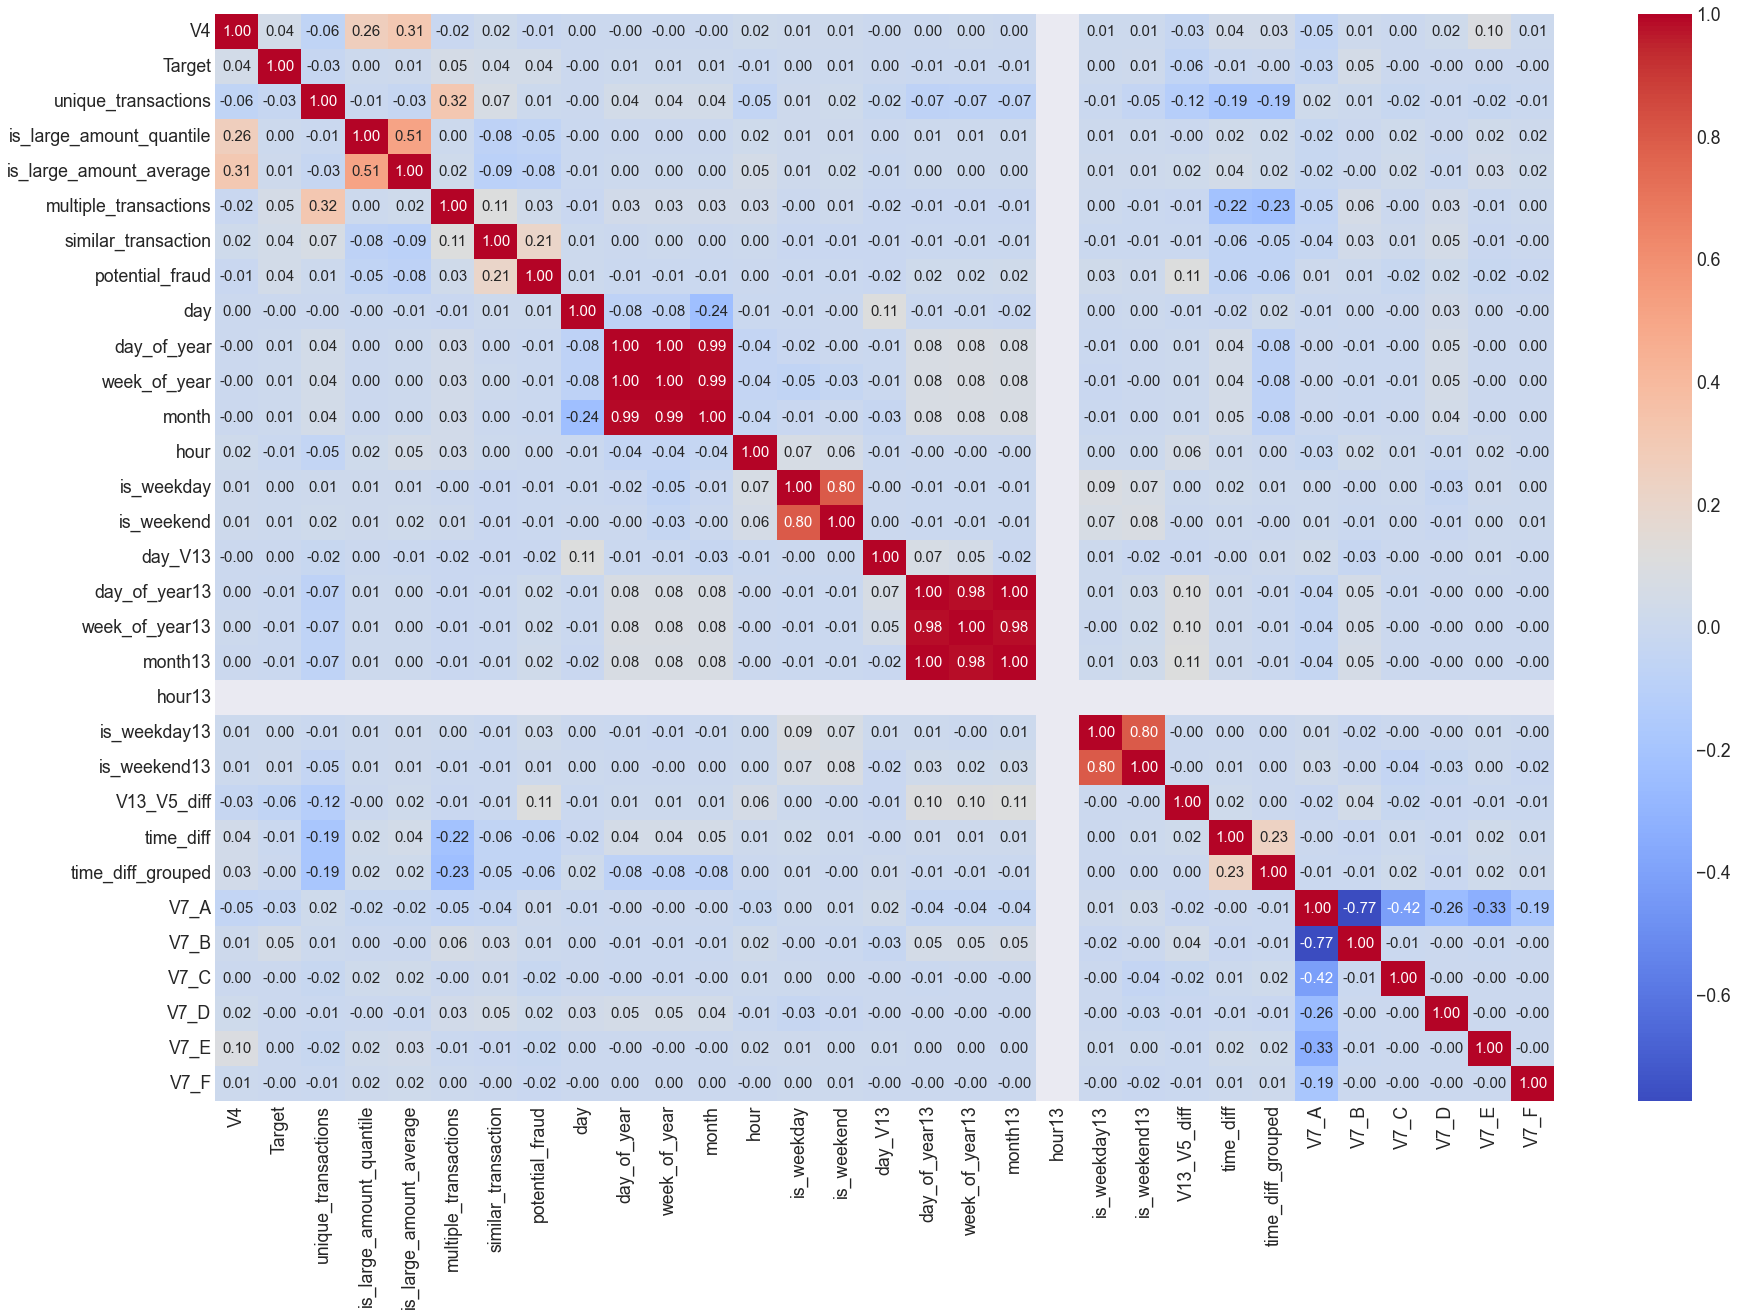

In [51]:
# calculate the correlation matrix
corr_matrix = one_hot_encoded_data.corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [52]:
one_hot_encoded_data.drop(features_to_drop, axis=1, inplace=True)

In [53]:
one_hot_encoded_data.head()

,V4,Target,unique_transactions,is_large_amount_quantile,is_large_amount_average,multiple_transactions,similar_transaction,potential_fraud,day,day_of_year,...,is_weekend,day_V13,day_of_year13,is_weekday13,is_weekend13,V13_V5_diff,time_diff,time_diff_grouped,V7_A,V7_B
163778,4.175,0,42,0,0,1,0,0,19,79,...,0,19.0,79.0,4.0,0,0.989722,0,1,1,0
163773,334.835,0,42,0,0,1,0,1,19,79,...,0,14.0,74.0,6.0,1,121.010278,1,1,1,0
163776,2505.000,0,42,1,1,1,0,1,19,79,...,0,14.0,74.0,6.0,1,121.037500,1,0,1,0
163775,208.750,0,42,0,0,1,0,1,19,79,...,0,14.0,74.0,6.0,1,121.047778,0,2687,1,0
163772,492.650,0,42,0,1,0,0,1,20,80,...,0,14.0,74.0,6.0,1,165.838333,2687,4841,1,0


In [54]:
one_hot_encoded_data.shape

(233633, 22)

In [55]:
X = one_hot_encoded_data.drop("Target", axis=1)
y = one_hot_encoded_data["Target"]

In [56]:
# %%time
# from sklearn.ensemble import GradientBoostingRegressor
# X = one_hot_encoded_data.copy()
# # build initial model using all the features
# model = GradientBoostingRegressor(n_estimators=10, max_depth=4, random_state=10)

# # Setup the RFE selector

# sel = RecursiveFeatureElimination(
#     variables=None, # automatically evaluate all numerical variables
#     estimator = model, # the ML model
#     scoring = 'r2', # the metric we want to evalute
#     threshold = 0.001, # the maximum performance drop allowed to remove a feature
#     cv=10, # cross-validation
# )

# # this may take quite a while, because
# # we are building a lot of models with cross-validation
# #X = X.iloc[0:45593]
# sel.fit(X, y)

# # performance of model trained using all features

# sel.initial_model_performance_

# # importance of all features based of initial model
# sel.feature_importances_.plot.bar(figsize=(20,6))
# plt.xlabel('Features')
# plt.ylabel('Importance')
# plt.show()

# select top k features based on chi-squared statistical test

In [57]:
X.describe()

,V4,unique_transactions,is_large_amount_quantile,is_large_amount_average,multiple_transactions,similar_transaction,potential_fraud,day,day_of_year,hour,...,is_weekend,day_V13,day_of_year13,is_weekday13,is_weekend13,V13_V5_diff,time_diff,time_diff_grouped,V7_A,V7_B
count,233633.000000,233633.000000,233633.000000,233633.000000,233633.000000,233633.000000,233633.000000,233633.000000,233633.000000,233633.000000,...,233633.00000,233633.000000,233633.000000,233633.000000,233633.000000,233633.000000,233633.000000,233633.000000,233633.000000,233633.000000
mean,266.360390,262.930053,0.048923,0.159956,0.352960,0.164947,0.499313,15.791990,169.548339,9.471988,...,0.29254,15.628721,172.278955,4.075122,0.302564,16380.700677,3737.843049,3737.843049,0.978441,0.013025
std,1338.657212,531.026377,0.215707,0.366566,0.477891,0.371133,0.500001,8.687133,52.567214,7.331914,...,0.45493,8.508743,99.718937,2.034402,0.459369,20557.956583,7335.528994,7335.528994,0.145240,0.113380
min,0.008350,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,76.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,0.000000,-11.083056,0.000000,0.000000,0.000000,0.000000
25%,12.525000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,125.000000,4.000000,...,0.00000,9.000000,89.000000,2.000000,0.000000,2787.163889,70.000000,70.000000,1.000000,0.000000
50%,33.400000,91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,170.000000,8.000000,...,0.00000,15.000000,163.000000,4.000000,0.000000,9580.447083,1211.000000,1211.000000,1.000000,0.000000
75%,115.230000,211.000000,0.000000,0.000000,1.000000,0.000000,1.000000,23.000000,215.000000,14.000000,...,1.00000,23.000000,247.000000,6.000000,1.000000,21765.316944,4258.000000,4258.000000,1.000000,0.000000
max,41750.000000,3467.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,259.000000,23.000000,...,1.00000,31.000000,366.000000,7.000000,1.000000,151104.187222,236982.000000,236982.000000,1.000000,1.000000


In [58]:
X_custom = X
X_custom.drop(['V13_V5_diff'],axis = 1, inplace = True)

In [59]:
# select top k features based on chi-squared statistical test
k = 15
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X_custom, y)

# get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# get the names of the selected features
selected_feature_names = X_custom.columns[selected_indices].tolist()

In [60]:
print(selected_feature_names)

['V4', 'unique_transactions', 'is_large_amount_average', 'multiple_transactions', 'similar_transaction', 'potential_fraud', 'day_of_year', 'hour', 'is_weekend', 'day_of_year13', 'is_weekend13', 'time_diff', 'time_diff_grouped', 'V7_A', 'V7_B']


In [ ]:
X = X[selected_feature_names]

# Scaling

In [61]:
#Scale the features using StandardScaler -- Training Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

# Model building and Hyperparameter tuning

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

In [63]:
from imblearn.over_sampling import ADASYN, SMOTE
# Apply ADASYN to the training data
adasyn = ADASYN(sampling_strategy = 'minority', n_neighbors = 10, random_state=42)
smote = SMOTE(sampling_strategy = 'minority', k_neighbors = 8, random_state=42)

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)


In [64]:
# Calculate the class weights
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y_train)


# LDA

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Create an instance of LDA
lda = LinearDiscriminantAnalysis(solver = 'eigen')

# Fit the LDA model to the training data
lda.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = lda.predict(X_val)

# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.69      0.81     58086
           1       0.01      0.82      0.03       323

    accuracy                           0.69     58409
   macro avg       0.51      0.76      0.42     58409
weighted avg       0.99      0.69      0.81     58409



In [66]:
precision, recall, threshold = metrics.precision_recall_curve(y_val,y_pred)
score = max(0, 100*metrics.auc(precision,recall))
print(score)

41.39529002933139


# logistic regression

In [67]:
# Define the logistic regression model
log_reg = LogisticRegression(C=0.001, class_weight = {0: 8, 1: 2}, random_state=0)
#log_reg = LogisticRegression(class_weight={0: 7, 1: 69})
# Fit the model to the training data
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = log_reg.predict(X_val)

# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     58086
           1       0.06      0.43      0.10       323

    accuracy                           0.96     58409
   macro avg       0.53      0.69      0.54     58409
weighted avg       0.99      0.96      0.97     58409



In [69]:
precision, recall, threshold = metrics.precision_recall_curve(y_val,y_pred)
score = max(0, 100*metrics.auc(precision,recall))
print(score)

23.85704537394192


In [72]:
%%time

# Define hyperparameters to search over
param_grid = {
    'penalty': ['l2'],
    'C': [10],# [0.01, 0.1, 1, 10, 100, 1000]
    'solver': ['sag']
}

# Create logistic regression model
log_reg = LogisticRegression()

# Create cross-validation object with 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Train and evaluate the model with 10-fold cross-validation
scores = cross_val_score(log_reg, X, y, cv=cv, scoring='f1')


print("Best accuracy score: ", scores)

Best accuracy score:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
CPU times: total: 24.4 s
Wall time: 11.8 s


In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[55836,  2250],
       [  185,   138]], dtype=int64)

# knn

In [73]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
# Make predictions on the test data
y_pred = knn.predict(X_val)

# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58086
           1       0.69      0.21      0.32       323

    accuracy                           1.00     58409
   macro avg       0.84      0.61      0.66     58409
weighted avg       0.99      1.00      0.99     58409

CPU times: total: 2min 35s
Wall time: 48.6 s


In [74]:
precision, recall, threshold = metrics.precision_recall_curve(y_val,y_pred)
score = max(0, 100*metrics.auc(precision,recall))
print(score)

44.88548464834048


# SVM

In [ ]:
%%time
# Create an SVM classifier object
svm_clf = svm.SVC(probability = True)

# Train the classifier on the training data
svm_clf.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = svm_clf.predict(X_val)

# Print the classification report
print(classification_report(y_val, y_pred))

In [ ]:
precision, recall, threshold = metrics.precision_recall_curve(y_val,y_pred)
score = max(0, 100*metrics.auc(precision,recall))
print(score)

# Xgboost

In [75]:
%%time
xgb_clf = xgb.XGBClassifier(n_estimators=200, learning_rate=0.3, random_state=123, max_depth=6)
xgb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_clf.predict(X_val)

# Print the classification report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58086
           1       0.95      0.63      0.76       323

    accuracy                           1.00     58409
   macro avg       0.98      0.82      0.88     58409
weighted avg       1.00      1.00      1.00     58409

CPU times: total: 2min 27s
Wall time: 43.6 s


In [82]:
precision, recall, threshold = metrics.precision_recall_curve(y_val,y_pred)
score = max(0, 100*metrics.auc(precision,recall))
print(score)

56.98274007182904


# Neural network

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
score = model.evaluate(X_val, y_val, verbose=0)

Epoch 1/10
5476/5476 [==============================] - 16s 3ms/step - loss: 0.0307 - accuracy: 0.9942 - val_loss: 0.0222 - val_accuracy: 0.9949
Epoch 2/10
5476/5476 [==============================] - 14s 3ms/step - loss: 0.0232 - accuracy: 0.9949 - val_loss: 0.0203 - val_accuracy: 0.9953
Epoch 3/10
5476/5476 [==============================] - 14s 3ms/step - loss: 0.0219 - accuracy: 0.9952 - val_loss: 0.0194 - val_accuracy: 0.9954
Epoch 4/10
5476/5476 [==============================] - 14s 3ms/step - loss: 0.0205 - accuracy: 0.9954 - val_loss: 0.0187 - val_accuracy: 0.9955
Epoch 5/10
5476/5476 [==============================] - 14s 3ms/step - loss: 0.0201 - accuracy: 0.9953 - val_loss: 0.0185 - val_accuracy: 0.9955
Epoch 6/10
5476/5476 [==============================] - 14s 3ms/step - loss: 0.0194 - accuracy: 0.9956 - val_loss: 0.0181 - val_accuracy: 0.9954
Epoch 7/10
5476/5476 [==============================] - 14s 3ms/step - loss: 0.0187 - accuracy: 0.9957 - val_loss: 0.0180 - val_ac

In [78]:
# Make predictions on the test data
y_pred = model.predict(X_val)
y_pred = np.where(y_pred > 0.5, 1, 0)
# Print the classification report
print(classification_report(y_val, y_pred))

1826/1826 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58086
           1       0.90      0.25      0.39       323

    accuracy                           1.00     58409
   macro avg       0.95      0.62      0.69     58409
weighted avg       1.00      1.00      0.99     58409



In [81]:
precision, recall, threshold = metrics.precision_recall_curve(y_val,y_pred)
score = max(0, 100*metrics.auc(precision,recall))
print(score)

56.98274007182904


# Model predictions

In [84]:
print(knn.predict_proba(X_val))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [85]:
print(knn.predict(X_val))

[0 0 0 ... 0 0 0]


__Best MODEL we get is XGBOOST but it is failing in prediction on test data. Only logistic regression is giving permiasible result on test data__ 

# Metrics calculation and graph plotting

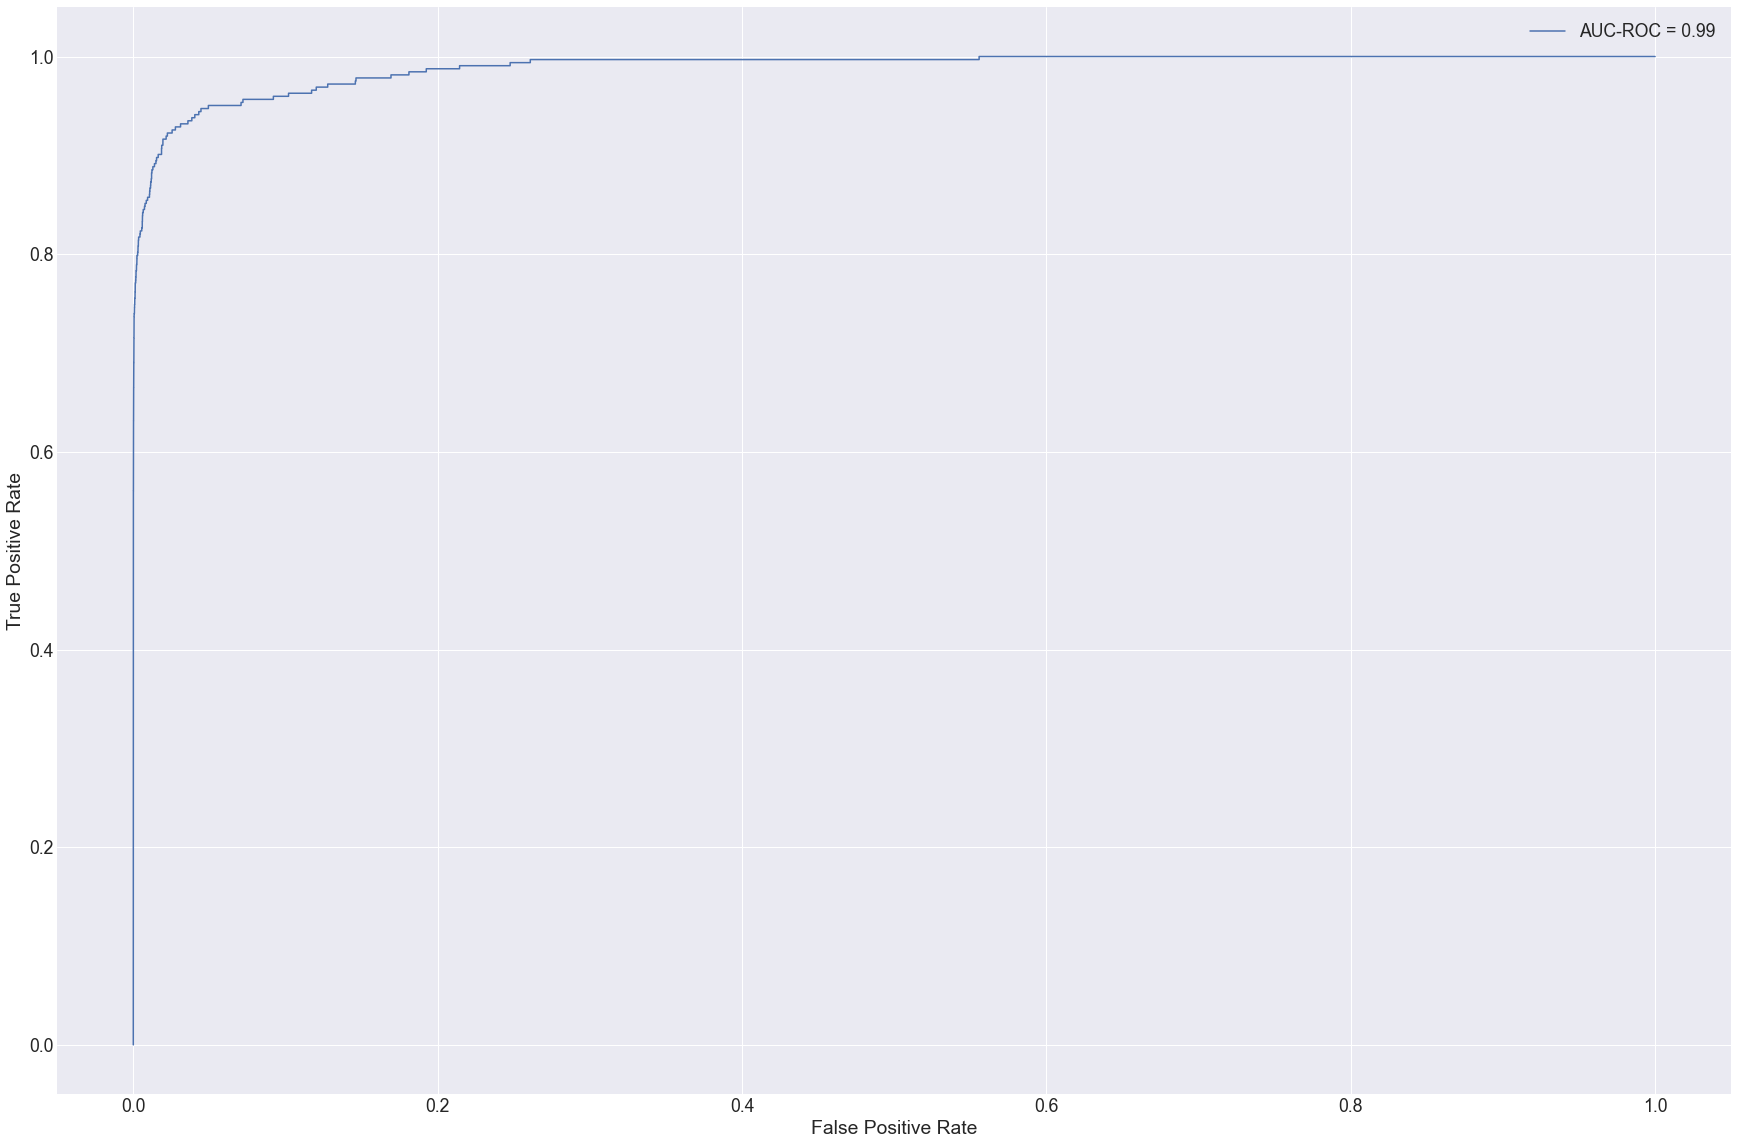

In [88]:
# Calculate AUC-ROC score and plot the curve
auc_roc = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])
fpr, tpr, _ = roc_curve(y_val, xgb_clf.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr, label=f"AUC-ROC = {auc_roc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Submission

In [89]:
test_df = pd.read_csv("G:/Final_laptop_backup/HSBC_challenge/dataset/test.csv")
V2 = test_df['V2'].tolist()
test_df_bkp = test_df.copy()

In [90]:
test_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,CUID6660,TID198043,EID908838,4154.125,13-08-2020 08:41,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
1,CUID6660,TID312736,EID502971,8350.000,17-08-2020 04:13,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
2,CUID6660,TID308818,EID231193,20.875,11-08-2020 01:40,363981,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
3,CUID6660,TID321252,EID1124129,20457.500,30-08-2020 22:11,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
4,CUID6660,TID420788,EID908838,4154.125,13-08-2020 08:40,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00


In [91]:
#test_df = test_df[test_df['V1'] == 'CUID6660']

In [92]:
test_df['V6'] = test_df['V6'].astype(str)

In [93]:
# Group the DataFrame by CUID and count the unique transactions for each CUID
unique_transactions = test_df.groupby('V1')['V2'].nunique()

In [94]:
# Create a new DataFrame with the unique transactions for each CUID
df_unique_transactions = pd.DataFrame({'V1': unique_transactions.index, 'unique_transactions': unique_transactions.values})

In [95]:
# Merge the original DataFrame with the new DataFrame on CUID
test_df = pd.merge(test_df, df_unique_transactions, on='V1')

In [96]:
# Calculate the 95% quantile transaction amount for each customer V1
quantile_amounts = test_df.groupby('V1')['V4'].quantile(.95)
# Add a new column to the dataframe indicating if the transaction amount is significantly larger than the average
test_df['is_large_amount_quantile'] = test_df.apply(is_significantly_larger_quantile, axis=1)

In [97]:
# Calculate the average transaction amount for each customer
avg_amounts = test_df.groupby('V1')['V4'].mean()

# Add a new column to the dataframe indicating if the transaction amount is significantly larger than the average
test_df['is_large_amount_average'] = test_df.apply(is_significantly_larger, axis=1)

In [98]:
%%time
test_df['V5'] = pd.to_datetime(test_df['V5'])
test_df['V13'] = pd.to_datetime(test_df['V13'])
# define the time window for multiple transactions
time_window = timedelta(minutes=60)

# create a new column for multiple transactions
test_df['multiple_transactions'] = 0

# add a new column 'similar_transaction' with default value 0
test_df['similar_transaction'] = 0

test_df['potential_fraud'] = 0

# loop through each unique customer ID
for customer_id in test_df['V1'].unique():
    # subset the dataframe for the current customer ID
    customer_df = test_df[test_df['V1'] == customer_id]
    # sort the dataframe by transaction date
    customer_df = customer_df.sort_values(by='V5')
    # loop through each row in the dataframe
    for i in range(1, len(customer_df)):
        # calculate the time difference between the current and previous transactions
        time_diff = customer_df.iloc[i]['V5'] - customer_df.iloc[i-1]['V5']
        # check if the time difference is within the time window
        if time_diff <= time_window:
            # set the multiple_transactions flag to True for the current and previous transactions
            test_df.at[customer_df.index[i], 'multiple_transactions'] = 1
            test_df.at[customer_df.index[i-1], 'multiple_transactions'] = 1
        
        if customer_df.iloc[i]['V4'] == customer_df.iloc[i-1]['V4'] :
            test_df.at[customer_df.index[i], 'similar_transaction'] = 1
            test_df.at[customer_df.index[i-1], 'similar_transaction'] = 1
        
        if customer_df.iloc[i]['V8'] == customer_df.iloc[i-1]['V8'] and customer_df.iloc[i]['V9'] == customer_df.iloc[i-1]['V9']:
            test_df.at[customer_df.index[i], 'potential_fraud'] = 1
            test_df.at[customer_df.index[i-1], 'potential_fraud'] = 1  


CPU times: total: 6min 54s
Wall time: 7min 7s


In [99]:
test_df_this = test_df.copy()

In [100]:
test_df['day'] = [i.day for i in test_df.V5]
#test_df['day_name'] = [i.day_name() for i in test_df.V5]
test_df['day_of_year'] = [i.dayofyear for i in test_df.V5]
test_df['week_of_year'] = [i.weekofyear for i in test_df.V5]
test_df['month'] = [i.month for i in test_df.V5]
test_df['hour'] = [i.hour for i in test_df.V5]
test_df['is_weekday'] = [i.isoweekday() for i in test_df.V5]
test_df['is_weekend'] = test_df.V5.dt.dayofweek.isin([5,6])
test_df['is_weekend'] = test_df['is_weekend'].replace({True: 1, False: 0})

test_df['day_V13'] = [i.day for i in test_df.V13]
#train_data['day_name'] = [i.day_name() for i in train_data.V5]
test_df['day_of_year13'] = [i.dayofyear for i in test_df.V13]
test_df['week_of_year13'] = [i.weekofyear for i in test_df.V13]
test_df['month13'] = [i.month for i in test_df.V13]
test_df['hour13'] = [i.hour for i in test_df.V13]
test_df['is_weekday13'] = [i.isoweekday() for i in test_df.V13]
test_df['is_weekend13'] = test_df.V13.dt.dayofweek.isin([5,6])
test_df['is_weekend13'] = test_df['is_weekend13'].replace({True: 1, False: 0})

In [101]:
test_df['V13_V5_diff'] = (test_df['V5'] - test_df['V13']).dt.total_seconds().div(3600)

test_df['V13_V5_diff'] = test_df['V13_V5_diff'].fillna(test_df['V13_V5_diff'].median())
test_df['day_V13'] = test_df['day_V13'].fillna(test_df['day_V13'].median())
test_df['day_of_year13'] = test_df['day_of_year13'].fillna(test_df['day_of_year13'].median())
test_df['week_of_year13'] = test_df['week_of_year13'].fillna(test_df['week_of_year13'].median())
test_df['month13'] = test_df['month13'].fillna(test_df['month13'].median())
test_df['hour13'] = test_df['hour13'].fillna(test_df['hour13'].median())
test_df['is_weekday13'] = test_df['is_weekday13'].fillna(test_df['is_weekday13'].median())
test_df['is_weekend13'] = test_df['is_weekend13'].fillna(test_df['is_weekend13'].median())

test_df.drop(['V11'], axis = 1, inplace = True)


In [102]:
test_df = test_df.sort_values(['V1', 'V5'])
test_df['time_diff'] = test_df.groupby('V1')['V5'].diff().fillna(pd.Timedelta(seconds=0))
# group by customer ID and calculate the time difference between consecutive transactions
test_df['time_diff_grouped'] = test_df.groupby('V1')['time_diff'].shift(-1).fillna(pd.Timedelta(seconds=0))
# convert time difference to minutes
test_df['time_diff'] = test_df['time_diff'].dt.total_seconds().div(60).astype(int)
# convert grouped time difference to minutes
test_df['time_diff_grouped'] = test_df['time_diff_grouped'].dt.total_seconds().div(60).astype(int)


In [103]:
one_hot_encoded_data_test = pd.get_dummies(test_df, columns = ['V7'])

In [104]:
X_train.columns

Index(['V4', 'unique_transactions', 'is_large_amount_quantile',
       'is_large_amount_average', 'multiple_transactions',
       'similar_transaction', 'potential_fraud', 'day', 'day_of_year', 'hour',
       'is_weekday', 'is_weekend', 'day_V13', 'day_of_year13', 'is_weekday13',
       'is_weekend13', 'time_diff', 'time_diff_grouped', 'V7_A', 'V7_B'],
      dtype='object')

In [105]:
one_hot_encoded_data_test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V8', 'V9', 'V10', 'V12', 'V13',
       'unique_transactions', 'is_large_amount_quantile',
       'is_large_amount_average', 'multiple_transactions',
       'similar_transaction', 'potential_fraud', 'day', 'day_of_year',
       'week_of_year', 'month', 'hour', 'is_weekday', 'is_weekend', 'day_V13',
       'day_of_year13', 'week_of_year13', 'month13', 'hour13', 'is_weekday13',
       'is_weekend13', 'V13_V5_diff', 'time_diff', 'time_diff_grouped', 'V7_A',
       'V7_B', 'V7_C', 'V7_D', 'V7_E', 'V7_F'],
      dtype='object')

In [106]:
one_hot_encoded_data_test = one_hot_encoded_data_test[X_train.columns.tolist()]

In [107]:
#scaler = StandardScaler()
one_hot_encoded_data_test_scaled = pd.DataFrame(scaler.fit_transform(one_hot_encoded_data_test), index=one_hot_encoded_data_test.index, columns=one_hot_encoded_data_test.columns)

In [108]:
#one_hot_encoded_data_test_scaled = one_hot_encoded_data_test_scaled[selected_feature_names]

In [110]:
#one_hot_encoded_data_test_scaled.drop(['target_predicted','target_predicted_prob'], axis =1, inplace = True)

In [ ]:
%%time
target_predict = log_reg.predict(one_hot_encoded_data_test_scaled)
#target_predict = np.where(target_predict > 0.5, 1, 0)

In [ ]:
set(target_predict)

In [ ]:
%%time
pred_probability = log_reg.predict_proba(one_hot_encoded_data_test_scaled)[:,0]
pred_probability = [round(item,2) for item in pred_probability]

In [ ]:
print(pred_probability[:20])

In [ ]:
one_hot_encoded_data_test_scaled['target_predicted'] = target_predict
one_hot_encoded_data_test_scaled['target_predicted_prob'] = pred_probability

In [ ]:
%%time
for i in range(0, len(one_hot_encoded_data_test_scaled)):
    test_df_bkp.loc[one_hot_encoded_data_test_scaled.index[i], 'target_predicted'] = one_hot_encoded_data_test_scaled.target_predicted.iloc[i]
    test_df_bkp.loc[one_hot_encoded_data_test_scaled.index[i], 'target_predicted_prob'] = one_hot_encoded_data_test_scaled.target_predicted_prob.iloc[i]

In [ ]:
target_pred_new = test_df_bkp['target_predicted'].tolist()
target_pred_new = [int(item) for item in target_pred_new]
pred_prob_new = test_df_bkp['target_predicted_prob'].tolist()

In [ ]:
%%time
submission = pd.DataFrame()
submission['V2'] = V2
submission['Probability'] = pred_prob_new
submission['Target'] = target_pred_new
submission.to_csv("Submission_28.csv", index = False)

In [ ]:
submission.Target.value_counts()

# End

# Pycaret

In [121]:
train_data.head()

,V4,V7,Target,unique_transactions,is_large_amount_quantile,is_large_amount_average,multiple_transactions,similar_transaction,potential_fraud,day,...,day_V13,day_of_year13,week_of_year13,month13,hour13,is_weekday13,is_weekend13,V13_V5_diff,time_diff,time_diff_grouped
163778,4.175,A,0,42,0,0,1,0,0,19,...,19.0,79.0,12.0,3.0,0.0,4.0,0,0.989722,0,1
163773,334.835,A,0,42,0,0,1,0,1,19,...,14.0,74.0,11.0,3.0,0.0,6.0,1,121.010278,1,1
163776,2505.000,A,0,42,1,1,1,0,1,19,...,14.0,74.0,11.0,3.0,0.0,6.0,1,121.037500,1,0
163775,208.750,A,0,42,0,0,1,0,1,19,...,14.0,74.0,11.0,3.0,0.0,6.0,1,121.047778,0,2687
163772,492.650,A,0,42,0,1,0,0,1,20,...,14.0,74.0,11.0,3.0,0.0,6.0,1,165.838333,2687,4841


In [122]:
from pycaret.classification import *
s = setup(data = train_data, target = 'Target', session_id=123)

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Binary
3,Original data shape,"(233633, 26)"
4,Transformed data shape,"(233633, 31)"
5,Transformed train set shape,"(163543, 31)"
6,Transformed test set shape,"(70090, 31)"
7,Numeric features,24
8,Categorical features,1
9,Preprocess,True


In [123]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:13:04
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
print(best_model)

In [ ]:
model = create_model('xgboost')

In [ ]:
print(model)

In [ ]:
plot_model(model, plot='feature')

In [ ]:
unseen_predictions = predict_model(model, data=test_df)
unseen_predictions.head()

In [ ]:
target_predict = unseen_predictions['prediction_label'].tolist()
pred_probability = unseen_predictions['prediction_score'].tolist()


In [ ]:
%%time
pred_probability = gb_clf.predict_proba(one_hot_encoded_data_test_scaled)[:,0]
pred_probability = [round(item,2) for item in pred_probability]